In [153]:
# import all the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
%matplotlib inline

In [154]:
# read the datasets into pandas dataframes
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN

print(f"Train dataset shape: {train.shape}")
print(f"Test dataset shape: {test.shape}")

data = pd.concat([train, test])
data.shape

Train dataset shape: (891, 13)
Test dataset shape: (418, 13)


(1309, 13)

In [155]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [156]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [157]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [158]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [159]:
# get numeric features
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [160]:
# seperate features
train_num = train[['Age', 'SibSp', 'Parch', 'Fare']]
train_cat = train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

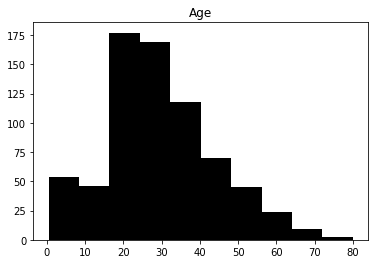

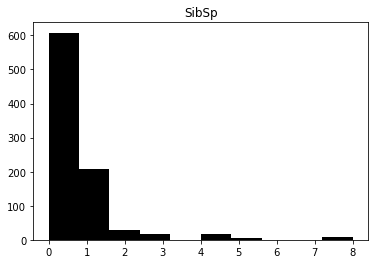

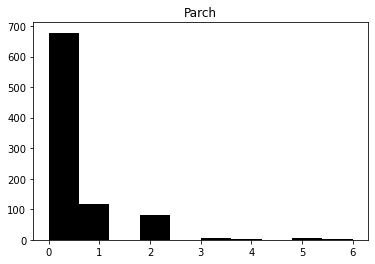

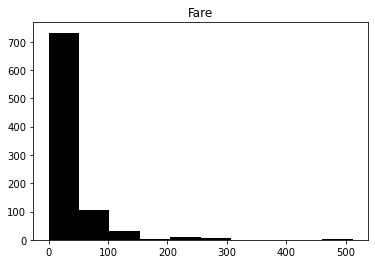

In [161]:
# build histograms for all numeric features
for i in train_num.columns:
    plt.hist(train_num[i], color='k')
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

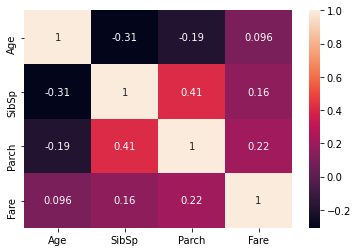

In [162]:
# correlation table
print(train_num.corr())
sns.heatmap(train_num.corr(), annot=True)

In [163]:
pd.pivot_table(train, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


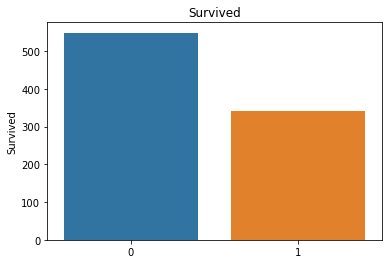

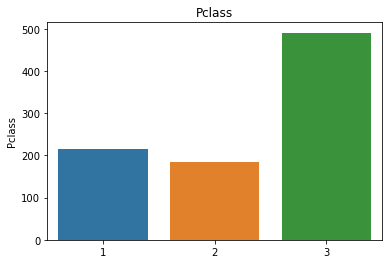

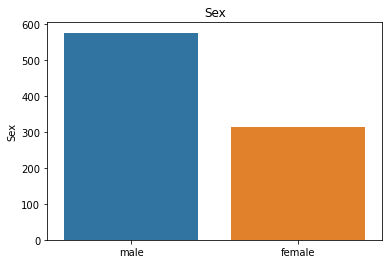

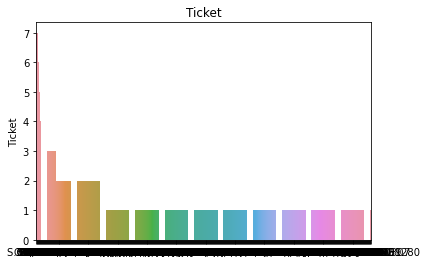

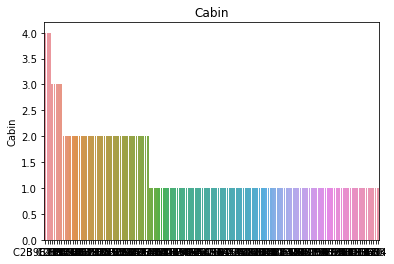

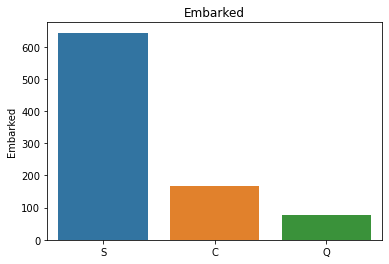

In [164]:
# visualize categorical variables
for i in train_cat.columns:
    sns.barplot(x=train_cat[i].value_counts().index, y=train_cat[i].value_counts()).set_title(i)
    plt.show()

In [165]:
print(pd.pivot_table(train, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print("------------------")
print(pd.pivot_table(train, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print("------------------")
print(pd.pivot_table(train, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
------------------
Sex       female  male
Survived              
0             81   468
1            233   109
------------------
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [166]:
train['cabin_multiples'] = train['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train['cabin_multiples'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiples, dtype: int64

In [167]:
pd.pivot_table(train, index='Survived', columns='cabin_multiples', values='Ticket', aggfunc='count')

cabin_multiples,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [168]:
train['cabin_letter'] = train['Cabin'].apply(lambda x: str(x)[0] if not pd.isna(x) else '?')
print(train['cabin_letter'].value_counts())
pd.pivot_table(train, index='Survived', columns='cabin_letter', values='Ticket', aggfunc='count')

?    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_letter, dtype: int64


cabin_letter,?,A,B,C,D,E,F,G,T
Survived,,,,,,,,,
0,481.0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0
1,206.0,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN


In [169]:
# find some insights about the tickets
train['ticket_numeric'] = train['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
train['ticket_letters'] = train['Ticket'].apply(lambda x: ''.join(x.split()[:-1]).replace('/', '').replace('.', '').lower() \
if len(x.split()[:-1]) > 0 else 0)

train['ticket_numeric'].value_counts()

1    661
0    230
Name: ticket_numeric, dtype: int64

In [170]:
train['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
wep            3
pp             3
scah           2
sotono2        2
ppp            2
swpp           2
sp             1
scow           1
as             1
sop            1
scahbasle      1
fa             1
fc             1
sca4           1
sc             1
casoton        1
Name: ticket_letters, dtype: int64

In [171]:
pd.pivot_table(train, index='Survived', columns='ticket_numeric', values='Ticket', aggfunc='count')

ticket_numeric,0,1
Survived,,
0,142,407
1,88,254


In [172]:
pd.pivot_table(train, index='Survived', columns='ticket_letters', values='Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [173]:
train['Name'].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [174]:
# extract name titles like mr, mrs, miss etc.
train['name_title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
train['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Mme               1
Ms                1
Lady              1
the Countess      1
Sir               1
Jonkheer          1
Don               1
Capt              1
Name: name_title, dtype: int64

In [175]:
data['cabin_multiples'] = data['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
data['cabin_letter'] = data['Cabin'].apply(lambda x: str(x)[0] if not pd.isna(x) else '?')
data['ticket_numeric'] = data['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
data['ticket_letters'] = data['Ticket'].apply(lambda x: ''.join(x.split()[:-1]).replace('/', '').replace('.', '').lower() \
if len(x.split()[:-1]) > 0 else 0)
data['name_title'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      1309 non-null   int64  
 1   Survived         891 non-null    float64
 2   Pclass           1309 non-null   int64  
 3   Name             1309 non-null   object 
 4   Sex              1309 non-null   object 
 5   Age              1046 non-null   float64
 6   SibSp            1309 non-null   int64  
 7   Parch            1309 non-null   int64  
 8   Ticket           1309 non-null   object 
 9   Fare             1308 non-null   float64
 10  Cabin            295 non-null    object 
 11  Embarked         1307 non-null   object 
 12  train_test       1309 non-null   int64  
 13  cabin_multiples  1309 non-null   int64  
 14  cabin_letter     1309 non-null   object 
 15  ticket_numeric   1309 non-null   int64  
 16  ticket_letters   1309 non-null   object 
 17  name_title     

<AxesSubplot:>

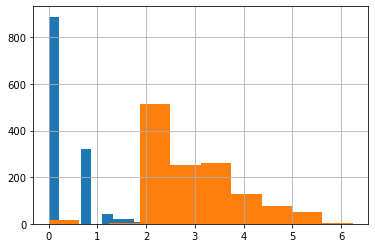

In [176]:
# deal with null values
data['Age'] = data['Age'].fillna(train.Age.mean())
data['Fare'] = data['Fare'].fillna(train.Fare.median())

data.dropna(subset=['Embarked'], inplace=True)

data['norm_sibsp'] = np.log(data['SibSp'] + 1)
data['norm_sibsp'].hist()

data['norm_fare'] = np.log(data['Fare'] + 1)
data['norm_fare'].hist()

In [177]:
data['Pclass'] = data['Pclass'].astype(str)

dummies = pd.get_dummies(data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'norm_fare', 'Embarked', 'cabin_multiples',
                              'cabin_letter', 'ticket_numeric', 'name_title', 'train_test']])

dummies

,Age,SibSp,Parch,norm_fare,cabin_multiples,ticket_numeric,train_test,Pclass_1,Pclass_2,Pclass_3,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,22.000000,1,0,2.110213,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,38.000000,1,0,4.280593,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,26.000000,0,0,2.188856,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,35.000000,1,0,3.990834,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,35.000000,0,0,2.202765,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,29.699118,0,0,2.202765,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
414,39.000000,0,0,4.699571,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
415,38.500000,0,0,2.110213,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
416,29.699118,0,0,2.202765,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [178]:
X_train = dummies[dummies['train_test'] == 1].drop(['train_test'], axis=1)
X_test = dummies[dummies['train_test'] == 0].drop(['train_test'], axis=1)

y_train = data[data['train_test'] == 1].Survived
y_train.shape

(889,)

In [179]:
# scaling
scaler = preprocessing.StandardScaler()
dummies_scaled = dummies.copy()
dummies_scaled[['Age', 'SibSp', 'Parch', 'norm_fare']] = scaler.fit_transform(dummies_scaled
                                                                              [['Age', 'SibSp', 'Parch', 'norm_fare']])

X_train_scaled = dummies_scaled[dummies_scaled['train_test'] == 1].drop(['train_test'], axis=1)
X_test_scaled = dummies_scaled[dummies_scaled['train_test'] == 0].drop(['train_test'], axis=1)

In [180]:
# try different models
# Naive Bayes
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train_scaled, y_train, cv=5)
print(cv)
print(f"Mean: {cv.mean()}")

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
Mean: 0.7221735542436362


In [181]:
# Logistic regression
lr = LogisticRegression()
cv = cross_val_score(lr, X_train_scaled, y_train, cv=5)
print(cv)
print(f"Mean: {cv.mean()}")

[0.82022472 0.80898876 0.80337079 0.82022472 0.85310734]
Mean: 0.8211832666793626


In [182]:
lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr, X_train, y_train, cv=5)
print(cv)
print(f"Mean: {cv.mean()}")

[0.82022472 0.80898876 0.80337079 0.82022472 0.85310734]
Mean: 0.8211832666793626


In [183]:
# Decision tree
dt = DecisionTreeClassifier(random_state=0)
cv = cross_val_score(dt, X_train, y_train, cv=5)
print(cv)
print(f"Mean: {cv.mean()}")

[0.73595506 0.74719101 0.83146067 0.7752809  0.81355932]
Mean: 0.7806893924966672


In [184]:
dt = DecisionTreeClassifier(random_state=0)
cv = cross_val_score(dt, X_train_scaled, y_train, cv=5)
print(cv)
print(f"Mean: {cv.mean()}")

[0.73595506 0.74719101 0.83146067 0.76966292 0.80225989]
Mean: 0.7773059099853995


In [185]:
# K-nearest neighbors
knn = KNeighborsClassifier(n_neighbors=5)
cv = cross_val_score(knn, X_train, y_train, cv=5)
print(cv)
print(f"Mean: {cv.mean()}")

[0.76966292 0.80898876 0.80337079 0.81460674 0.83050847]
Mean: 0.8054275376118835


In [186]:
knn = KNeighborsClassifier(n_neighbors=5)
cv = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print(cv)
print(f"Mean: {cv.mean()}")

[0.79775281 0.79213483 0.83146067 0.80337079 0.85310734]
Mean: 0.8155652891512728


In [187]:
# Random Forest
rf = RandomForestClassifier(random_state=1)
cv = cross_val_score(rf, X_train, y_train, cv=5)
print(cv)
print(f"Mean: {cv.mean()}")

[0.80898876 0.79213483 0.85393258 0.73595506 0.83615819]
Mean: 0.8054338856090902


In [188]:
rf = RandomForestClassifier(random_state=1)
cv = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print(cv)
print(f"Mean: {cv.mean()}")

[0.80337079 0.79213483 0.85393258 0.73595506 0.83615819]
Mean: 0.8043102901034723


In [189]:
# Support Vector Machine
svc = SVC(probability=True)
cv = cross_val_score(svc, X_train_scaled, y_train, cv=5)
print(cv)
print(f"Mean: {cv.mean()}")

[0.84831461 0.82022472 0.8258427  0.80337079 0.86440678]
Mean: 0.8324319177299563


In [190]:
# XGBoost
xgb = XGBClassifier(eval_metric='error', use_label_encoder=False, random_state=1)
cv = cross_val_score(xgb, X_train_scaled, y_train, cv=5)
print(cv)
print(f"Mean: {cv.mean()}")

[0.8258427  0.80898876 0.84831461 0.78651685 0.81920904]
Mean: 0.8177743921792675


In [191]:
# Voting Classifier
vclf = VotingClassifier(estimators=[('gnb', gnb), ('lr', lr), ('knn', knn), ('rf', rf), ('svc', svc), ('xgb', xgb)], 
                      voting='soft')
cv = cross_val_score(vclf, X_train_scaled, y_train, cv=5)
print(cv)
print(f"Mean: {cv.mean()}")

[0.83146067 0.81460674 0.83146067 0.80337079 0.84745763]
Mean: 0.8256713007046278


In [192]:
vclf.fit(X_train_scaled, y_train)
y_pred = vclf.predict(X_test_scaled)
result = pd.DataFrame(np.concatenate((np.array(test.PassengerId).reshape(-1, 1), np.array(y_pred).reshape(-1, 1)), axis=1), 
                      columns=['PassengerId', 'Survived'], 
                      dtype='int32')
result.to_csv('submission_base.csv', index=False)

In [193]:
# pick the hyperparameters
def performance(classifier, model):
    print(model)
    print(f"Best score: {classifier.best_score_}")
    print(f"Best parameters: {classifier.best_params_}")

In [194]:
lr = LogisticRegression()
parameters = {
    'max_iter': [2000], 
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}
lr_ = GridSearchCV(lr, param_grid=parameters, n_jobs=-1, cv=5, verbose=True)
lr_clf = lr_.fit(X_train_scaled, y_train)
performance(lr_clf, 'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s


Logistic Regression
Best score: 0.8268075922046594
Best parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.3s finished


In [195]:
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'p': [1, 2]
}
knn_ = GridSearchCV(knn, param_grid=parameters, n_jobs=-1, cv=5, verbose=True)
knn_clf = knn_.fit(X_train_scaled, y_train)
performance(knn_clf, 'KNN')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s


KNN
Best score: 0.8301720307243065
Best parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.0s finished


In [196]:
svc = SVC(probability=True)
parameters = [
    {'kernel': ['rbf'],
     'gamma': [.1, .5, 1, 2, 5, 10],
     'C': [.1, 1, 100, 1000]},
    {'kernel': ['linear'],
     'C': [.1, 1, 100, 1000]},
    {'kernel': ['poly'],
     'C': [.1, 1, 100, 1000],
     'degree': [2, 3, 4, 5]}
]
svc_ = GridSearchCV(svc, param_grid=parameters, n_jobs=-1, cv=5, verbose=True)
svc_clf = svc_.fit(X_train_scaled, y_train)
performance(svc_clf, 'SVC') 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 44 candidates, totalling 220 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   20.0s


SVC
Best score: 0.8324319177299563
Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:  2.1min finished


In [197]:
rf = RandomForestClassifier(random_state=1)
parameters = {
    'n_estimators': [100, 500, 1000],
    'bootstrap': [True, False],
    'max_depth': [None, 3, 5, 10, 20, 50, 75, 100],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10]
}
rf_rand = RandomizedSearchCV(rf, param_distributions=parameters, n_iter=100, n_jobs=-1, cv=5, verbose=True)
rf_rand_clf = rf_rand.fit(X_train_scaled, y_train)
performance(rf_rand_clf, 'Random Forest')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.2min finished


Random Forest
Best score: 0.8346600647495714
Best parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [198]:
rf = RandomForestClassifier(random_state=1)
parameters = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [50, 75, 100],
    'max_features': ['auto'],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'bootstrap': [False],
}
rf_ = GridSearchCV(rf, param_grid=parameters, n_jobs=-1, cv=5, verbose=True)
rf_clf = rf_.fit(X_train_scaled, y_train)
performance(rf_clf, 'Random Forest') 

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  2.8min finished


Random Forest
Best score: 0.836926299752428
Best parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 300}


<AxesSubplot:>

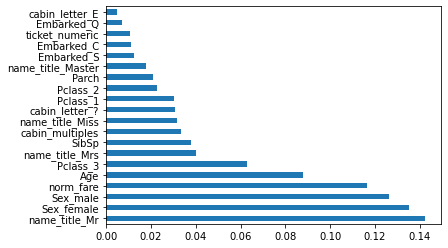

In [199]:
best_rf = rf_clf.best_estimator_.fit(X_train_scaled, y_train)
feature_imp = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feature_imp.nlargest(20).plot(kind='barh')

In [200]:
xgb = XGBClassifier(eval_metric='error', use_label_encoder=False, random_state=1)
parameters = {
    'n_estimators': [20, 50, 100, 250, 500, 1000],
    'colsample_bytree': [.2, .5, .7, .8, 1],
    'max_depth': [None, 2, 5, 10, 15, 20, 25],
    'reg_alpha': [0, .5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [.5, .6, .7, .8, .9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9],
    'gamma': [0, 0.01, 0.1, 1, 10, 100],
    'sampling_method': ['uniform', 'gradient_based']
}
xgb_rand = RandomizedSearchCV(xgb, param_distributions=parameters, n_iter=100, n_jobs=-1, cv=5, verbose=True)
xgb_rand_clf = xgb_rand.fit(X_train_scaled, y_train)
performance(xgb_rand_clf, 'XGB')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.6min finished


XGB
Best score: 0.8481495588141941
Best parameters: {'subsample': 0.8, 'sampling_method': 'uniform', 'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 1000, 'max_depth': 2, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1}


In [201]:
xgb = XGBClassifier(eval_metric='error', use_label_encoder=False, random_state=1)
parameters = {
    'n_estimators': [250],
    'colsample_bytree': [.2, .3],
    'max_depth': [10],
    'reg_alpha': [1],
    'reg_lambda': [1.25, 1.5, 1.75],
    'subsample': [.6, .7, .8],
    'learning_rate': [0.2],
    'gamma': [0, 0.01, 0.1],
    'sampling_method': ['uniform']
}
xgb_ = GridSearchCV(xgb, param_grid=parameters, n_jobs=-1, cv=5, verbose=True)
xgb_clf = xgb_.fit(X_train_scaled, y_train)
performance(xgb_clf, 'XGB') 

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   53.5s finished


XGB
Best score: 0.8503967498254301
Best parameters: {'colsample_bytree': 0.2, 'gamma': 0.01, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 250, 'reg_alpha': 1, 'reg_lambda': 1.75, 'sampling_method': 'uniform', 'subsample': 0.8}


In [202]:
y_pred_xgb = xgb_clf.best_estimator_.predict(X_test_scaled)
result_xgb = pd.DataFrame(np.concatenate((np.array(test.PassengerId).reshape(-1, 1), np.array(y_pred_xgb).reshape(-1, 1)), axis=1), 
                      columns=['PassengerId', 'Survived'], 
                      dtype='int32')
result.to_csv('submission_xgb.csv', index=False) # 0.76794 accuracy on Kaggle

In [203]:
best_lr = lr_clf.best_estimator_
best_knn = knn_clf.best_estimator_
best_svc = svc_clf.best_estimator_
best_rf = rf_clf.best_estimator_
best_xgb = xgb_clf.best_estimator_

In [204]:
# Voting (knn + svc + rf) hard/soft
vclf_h = VotingClassifier(estimators=[('knn', best_knn), ('rf', best_rf), ('svc', best_svc)], 
                      voting='hard')
vclf_s = VotingClassifier(estimators=[('knn', best_knn), ('rf', best_rf), ('svc', best_svc)], 
                      voting='soft')

In [205]:
# Voting (lr + knn + svc + rf)
vclf_no_xgb = VotingClassifier(estimators=[('lr', best_lr), ('knn', best_knn), ('rf', best_rf), ('svc', best_svc)], 
                      voting='soft')

In [206]:
# Voting (lr + knn + svc + rf + xgb)
vclf_all = VotingClassifier(estimators=[('lr', best_lr), ('knn', best_knn), ('rf', best_rf), ('svc', best_svc), ('xgb', best_xgb)], 
                      voting='soft')

In [207]:
print(f"Voting (hard): {cross_val_score(vclf_h, X_train, y_train, cv=5)}")
print(f"Voting (hard) mean: {cross_val_score(vclf_h, X_train, y_train, cv=5).mean()}")

print(f"Voting (soft): {cross_val_score(vclf_s, X_train, y_train, cv=5)}")
print(f"Voting (soft) mean: {cross_val_score(vclf_s, X_train, y_train, cv=5).mean()}")

print(f"Voting (no_xgb): {cross_val_score(vclf_no_xgb, X_train, y_train, cv=5)}")
print(f"Voting (no_xgb) mean: {cross_val_score(vclf_no_xgb, X_train, y_train, cv=5).mean()}")

print(f"Voting (all): {cross_val_score(vclf_all, X_train, y_train, cv=5)}")
print(f"Voting (all) mean: {cross_val_score(vclf_all, X_train, y_train, cv=5).mean()}")

Voting (hard): [0.79213483 0.8258427  0.8258427  0.81460674 0.83050847]
Voting (hard) mean: 0.8177870881736812
Voting (soft): [0.78089888 0.83146067 0.81460674 0.80337079 0.85875706]
Voting (soft) mean: 0.8189424236653335
Voting (no_xgb): [0.80337079 0.83146067 0.82022472 0.80898876 0.86440678]
Voting (no_xgb) mean: 0.8279375357074844
Voting (all): [0.8258427  0.83146067 0.83146067 0.8258427  0.86440678]
Voting (all) mean: 0.8391734907636641


In [208]:
vclf_h.fit(X_train_scaled, y_train)
vclf_s.fit(X_train_scaled, y_train)
vclf_no_xgb.fit(X_train_scaled, y_train)
vclf_all.fit(X_train_scaled, y_train)

best_rf.fit(X_train_scaled, y_train)
y_pred_best_rf = best_rf.predict(X_test_scaled)

y_pred_vclf_h = vclf_h.predict(X_test_scaled)
y_pred_vclf_s = vclf_s.predict(X_test_scaled)
y_pred_vclf_no_xgb = vclf_no_xgb.predict(X_test_scaled)
y_pred_vclf_all = vclf_all.predict(X_test_scaled)

In [209]:
result_rf = {'PassengerId': test.PassengerId, 'Survived': y_pred_best_rf}
submission2 = pd.DataFrame(data=result_rf, dtype='int32')

result_voting_h = {'PassengerId': test.PassengerId, 'Survived': y_pred_vclf_h}
submission3 = pd.DataFrame(data=result_voting_h, dtype='int32')

result_voting_s = {'PassengerId': test.PassengerId, 'Survived': y_pred_vclf_s}
submission4 = pd.DataFrame(data=result_voting_s, dtype='int32')

result_voting_no_xgb = {'PassengerId': test.PassengerId, 'Survived': y_pred_vclf_no_xgb}
submission5 = pd.DataFrame(data=result_voting_no_xgb, dtype='int32')

result_voting_all = {'PassengerId': test.PassengerId, 'Survived': y_pred_vclf_all}
submission6 = pd.DataFrame(data=result_voting_all, dtype='int32')

In [210]:
submission2.to_csv('submission_rf.csv', index=False) # 0.78468 accuracy on Kaggle
submission3.to_csv('submission_voting_h.csv', index=False) # 0.79665 accuracy on Kaggle BEST result
submission4.to_csv('submission_voting_s.csv', index=False) # 0.79425 accuracy on Kaggle
submission5.to_csv('submission_voting_no_xgb.csv', index=False) # 0.78468 accuracy on Kaggle
submission6.to_csv('submission_voting_all.csv', index=False) # 0.77990 accuracy on Kaggle